In [1]:
%matplotlib inline
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables

base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [7]:
#playing around with inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#does same as inspect function 
measurement_info = session.query(measurement).first()

In [11]:
#playing around with viewing tables 
measurement_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20b7a155490>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08}

In [12]:
#playing around with viewing tables 

station_info = session.query(station).first()

In [13]:
station_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20b7dfde310>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23',)

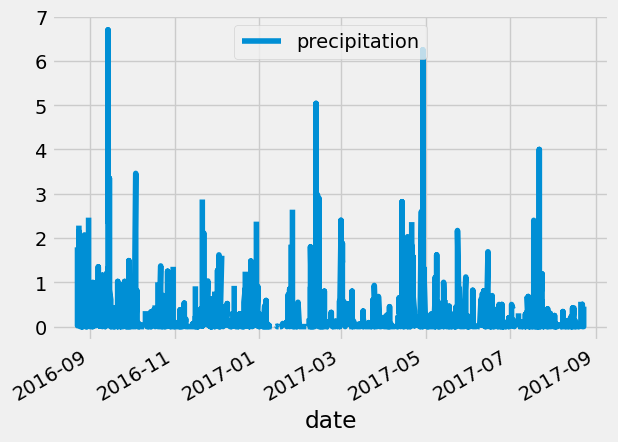

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

last12mo = dt.date(2017,8,23) - dt.timedelta(days = 365)
last12mo
# Perform a query to retrieve the data and precipitation scores

sel = [
       measurement.date,
       measurement.prcp,
      ]
percep_12mo = session.query(*sel).filter(measurement.date >= last12mo)
percep_12mo
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(percep_12mo)
df['date'] = pd.to_datetime(df['date'])



# Sort the dataframe by date
df.sort_values(by='date',ascending=False)
df.set_index('date')



# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='prcp',label='precipitation')
plt.legend(loc='upper center')


In [16]:
df.columns = ["date","Precipitation"]



In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
station_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20b7dfde310>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the 
# lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [25]:
import datetime as dt
from pandas.plotting import table

In [26]:
temps_12mo = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
filter(measurement.date >= last12mo).all()

In [30]:
df = pd.DataFrame(temps_12mo)


Text(0.5, 0, 'Temperature')

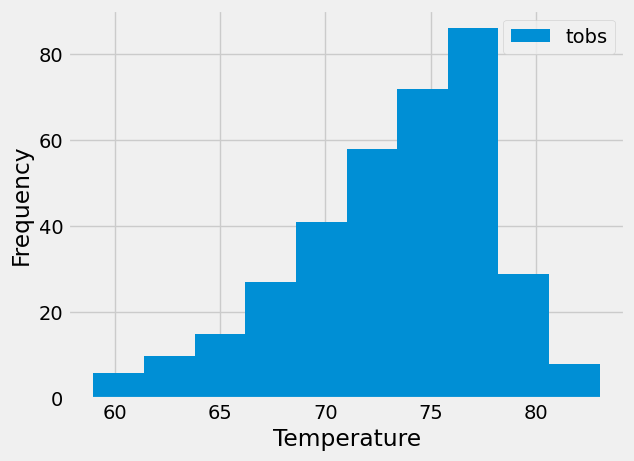

In [31]:
df.plot.hist(column='tobs')
plt.ylabel('Frequency')
plt.xlabel('Temperature')


# Close Session

In [29]:
session.close()